# Matrices de Características

## Ejemplo 101.1 - Matriz de características del estado de encendido en 2 interruptores

Supongamos que tenemos dos interruptores $(x_1, x_2)$ los cuales pueden estar encendidos o apagados.

Entonces podemos pensar en el estado de los interruptores como dos variables independientes que pueden estar apagados $(0, 0)$ o encendidos $(1, 1)$ o uno apago y el otro encendido $(1, 0)$ o $(0, 1)$.

Si los interruptores alimentaran un foco, podemos establecer un objetivo y la pregunta sería, cuándo el foco debería estar encendido. Por ejemplo, el foco debería prender cuando uno de los dos interruptores está encencido.

|$x_1$|$x_2$|$f$|
|---|---|---|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|

Entonces podemos pensar que el $foco$ ($f$) está encendido como resultado de una función determinada por el valor de las variables:

$f = F(x_1, x_2)$

En general podemos pensar que cualquier objetivo se ve como una función aplicada a las variables relacionadas al objetivo, la cuál es desconocida (la función objetivo), pero puede aproximada automáticamente, es decir,

Para una $y$ objetivo, existe un vector $\overline{x}$ y una función $F$ tal que:

$y = F(\overline{x})$

Si, la función $F$ es deconocida, podemos aproximar la función $\hat{F}$ que será similar a la función $F$, y nos producirá una salida casi idéntica a la original ($y$), teniendo:

$\hat{y} = \hat{F}(\overline{x})$

Donde:

$∑_i^n |y_i - \hat{y_i}| \le ϵ $

La función $\hat{F}$ es el modelo de aprendizaje automático que encontraremos como solución a determinar que la matriz de características se transforme en el matriz de objetivos.

> Una matriz de características tiene que ser numérica

In [ ]:
import numpy as np

# Matriz de características (X -> x1, x2)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])

> En análisis de un solo objetivo tenemos el vector de objetivos

In [ ]:
# Vector objetivo (y)
y = np.array([
    0,
    1,
    1,
    1,
])

Recuperar los ejes de características (vectores) a partir de la matriz de características

In [ ]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [ ]:
x1 = X[:, 0] # Todas las filas, Primera columna (0) -> [:, 0]

x1

array([0, 0, 1, 1])

In [ ]:
x2 = X[:, 1] # Todas las filas, Segunda columna (1) -> [:, 1]

x2

array([0, 1, 0, 1])

> Mostrar el espacio de características y usar el vector de objetivos como el color de cada muestra en el espacio.

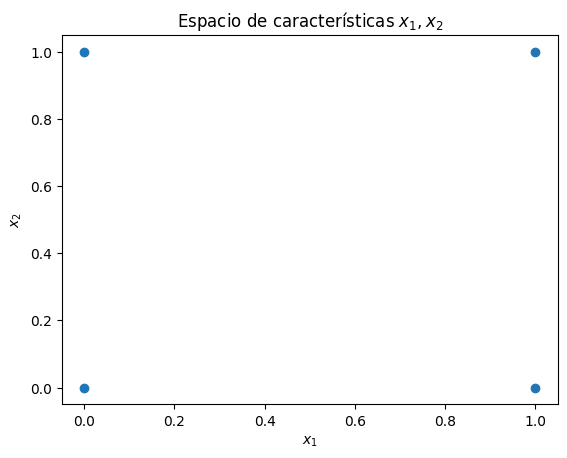

In [ ]:
import matplotlib.pyplot as plt

# plt.scatter(X[:, 0], X[:, 1])
plt.scatter(x1, x2)
plt.title("Espacio de características $x_1, x_2$")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

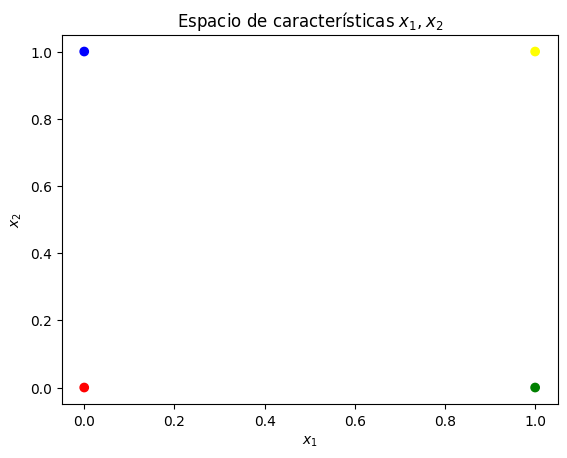

In [ ]:
plt.scatter(x1, x2, c=["red", "blue", "green", "yellow"])
plt.title("Espacio de características $x_1, x_2$")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

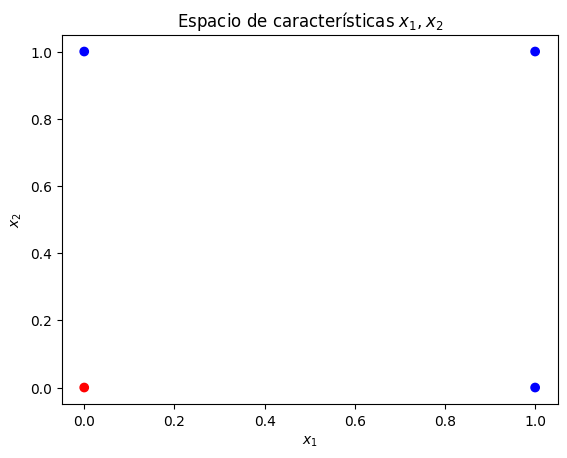

In [ ]:
plt.scatter(x1, x2, c=["blue" if yi == 1 else "red" for yi in y])
plt.title("Espacio de características $x_1, x_2$")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

<Axes: >

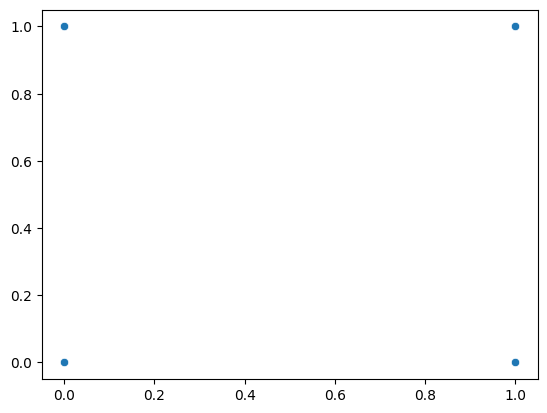

In [ ]:
import seaborn as sns

sns.scatterplot(x=x1, y=x2)

<Axes: >

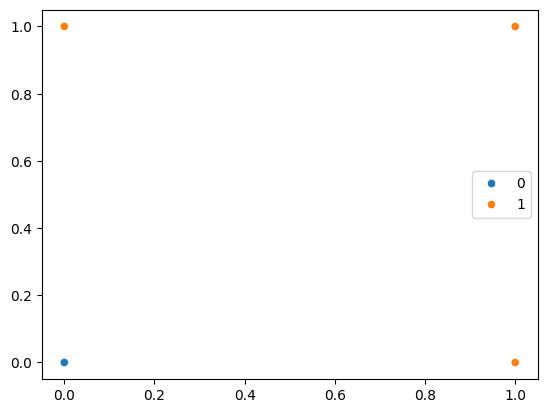

In [ ]:
import seaborn as sns

sns.scatterplot(x=x1, y=x2, hue=y) # <X> - x1 (característica 1) | <Y> - x2 (característica 2) | <COLOR> - y (vector objetivo)

## Ejemplo 101.2 - Matriz de características para la planta Iris

Vamos a cargar los datos del CSV que contienen las mediciones de 150 muestras de plantas iris en las familias Setosa, Versicolor y Virgínica, para seleccionar 2 características y ver su espacio de características, donde el objetivo sea la familia de cada planta:

1 - Setosa

2 - Versicolor

3 - Virginica

In [ ]:
import pandas as pd

iris = pd.read_csv("/content/iris.csv")

iris.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
iris.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
74,6.4,2.9,4.3,1.3,Versicolor
128,6.4,2.8,5.6,2.1,Virginica
36,5.5,3.5,1.3,0.2,Setosa
125,7.2,3.2,6.0,1.8,Virginica
64,5.6,2.9,3.6,1.3,Versicolor


In [ ]:
iris["class"] = iris["variety"].map({ "Setosa": 1, "Versicolor": 2, "Virginica": 3 })

iris.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety,class
96,5.7,2.9,4.2,1.3,Versicolor,2
71,6.1,2.8,4.0,1.3,Versicolor,2
139,6.9,3.1,5.4,2.1,Virginica,3
37,4.9,3.6,1.4,0.1,Setosa,1
47,4.6,3.2,1.4,0.2,Setosa,1


In [ ]:
X = iris[["sepal.length", "sepal.width", "petal.length", "petal.width"]].values

X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
y = iris["class"].values

y[:5] # 1 - Setosa | 2 - Versicolor | 3 - Virginica

array([1, 1, 1, 1, 1])

<Axes: >

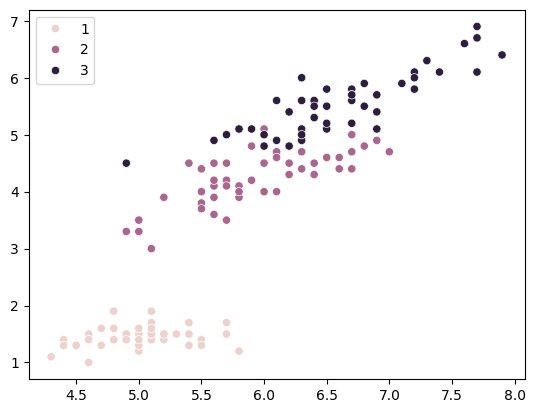

In [ ]:
x1 = X[:, 0] # 0 - Sepal Length
x2 = X[:, 2] # 2 - Petal Length

import seaborn as sns

sns.scatterplot(x=x1, y=x2, hue=y)

<Axes: >

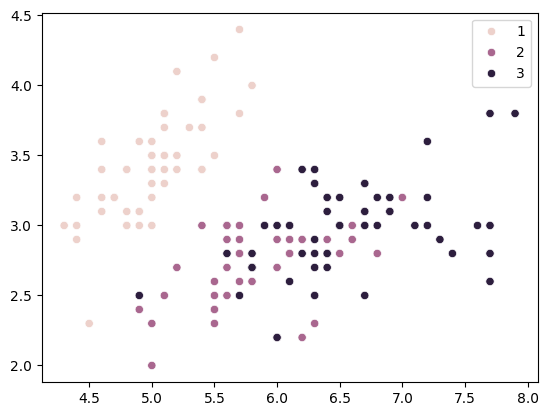

In [ ]:
x1 = X[:, 0] # 0 - Sepal Length
x2 = X[:, 1] # 1 - Sepal Width

import seaborn as sns

sns.scatterplot(x=x1, y=x2, hue=y)

### Demostración en el porcentaje de aprendizaje mediante:

* **Sepal Length vs Petal Length**
* **Sepal Length vs Sepal Width**

In [ ]:
from sklearn.svm import SVC

clf1 = SVC()
clf2 = SVC()

X1 = iris[["sepal.length", "petal.length"]].values
X2 = iris[["sepal.length", "sepal.width"]].values

y =iris["class"].values

clf1.fit(X1, y)
clf2.fit(X2, y)

print("CLF 1:", clf1.score(X1, y)) # 96%
print("CLF 2:", clf2.score(X2, y)) # 82%

CLF 1: 0.96
CLF 2: 0.82


In [ ]:
from sklearn.svm import SVC

clf3 = SVC()
clf4 = SVC()

X3 = iris[["sepal.width", "petal.width"]].values
X4 = iris[["petal.length", "petal.width"]].values

y =iris["class"].values

clf3.fit(X3, y)
clf4.fit(X4, y)

print("CLF 3:", clf3.score(X3, y)) # 96%
print("CLF 4:", clf4.score(X4, y)) # 95%

CLF 3: 0.96
CLF 4: 0.9533333333333334


In [ ]:
clf1.predict([
    [4.6, 1.5], # Setosa [OK]
    [5.6, 3.9], # Versicolor [OK]
    [6.5, 4.8], # Versicolor [ERROR]
    [7.9, 6.4], # Virginica [OK]
])

array([1, 2, 2, 3])